## TI602 - Tópicos Inovadores em Computação

#### Trabalho Final - CNN com CIFAR-10

---

#### Nomes
*   Aluno 1
*   Aluno 2
*   Aluno 3
*   Aluno 4

*Trabalho desenvolvido utilizando Google Colab ou Jupyter*.

### Atividades

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import utils, optimizers, regularizers, initializers

import numpy as np

import matplotlib.pyplot as plt

1. Carregamento do dataset e separação dos dados de treinamento e validação. Todos os treinamentos intermediários devem ser avaliados neste conjunto de validação.

In [ ]:
cifar10 = datasets.cifar10

# Carrega os dados, que já vem divididos em conjunto de treinamento e teste.
(x_trainVal, y_trainVal), (x_test, y_test) = cifar10.load_data()

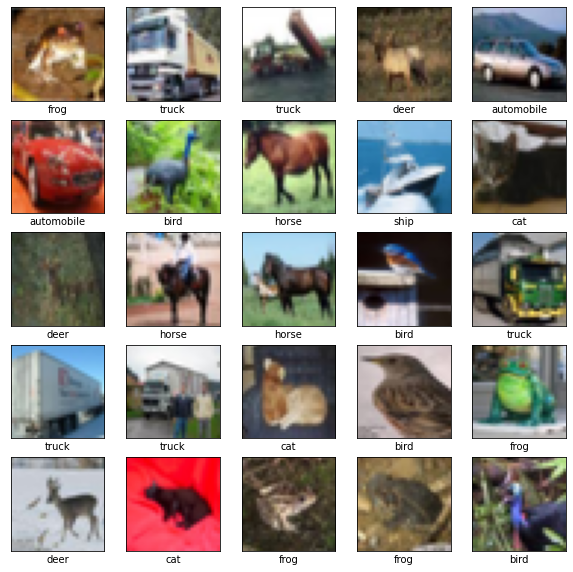

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_trainVal[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_trainVal[i][0]])
plt.show()

In [ ]:
# Embaralha os dados e divide em 80% para treino, 20% para validação (pode utilizar outros percentuais)
nData = x_trainVal.shape[0]  
nTrain = int(nData * 0.8)  
randomIdx = np.random.permutation(np.arange(nData))
trainIdx = randomIdx[:nTrain] 
valIdx = randomIdx[nTrain:]

# Divide os dados
x_val, y_val = x_trainVal[valIdx], y_trainVal[valIdx]
x_train, y_train = x_trainVal[trainIdx], y_trainVal[trainIdx]

# Normalização dados entre [0, 1]
x_train = 
x_val = 
x_test = 

print("Formato das imagens de treinamento", x_train.shape)
print("Formato dos rótulos de treinamento", y_train.shape)
print()

print("Formato das imagens de validação", x_val.shape)
print("Formato dos rótulos de validação", y_val.shape)

historyList = []
legend = []

# Determinar os parâmetros adequados
batch_size = 32
epochs = 10

Formato das imagens de treinamento (40000, 32, 32, 3)
Formato dos rótulos de treinamento (40000, 1)

Formato das imagens de validação (10000, 32, 32, 3)
Formato dos rótulos de validação (10000, 1)


2. Rede neural convolucional baseline. Sugestão: comece por uma arquitetura simples

In [ ]:
# Baseline
model_baseline = Sequential()
#Camadas
model_baseline.add()


#Operação de vetorização dos dados
model_baseline.add(Flatten())
#Densa com 10 nós de saída e ativação SofMax
model_baseline.add(Dense(10, activation='softmax'))

model_baseline.summary()

# Criando o modelo (pode alterar os parâmetros)
model_baseline.compile(optimizer='adam',
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),              
                       metrics=['accuracy'])


3. Explore ajustes, etc. (por exemplo o impacto de variar a quantidade de camadas de convolução e pooling, dropout, funções de ativação). Cuidado com overfitting!

4. Plote os gráficos da função de loss x número de épocas, para o treino e validação de cada modelo testado/avaliado. Houve overfitting?

In [ ]:
def plot_loss_accuracy(historyList, legend, plotSet="both"):
    linestyles = ['-', '--', ':', '-.']
    fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

    #Plot Loss
    for idx,hist in enumerate(historyList):
        if plotSet in ["train", "both"]:
            ax1.plot(hist.history['loss'], linestyle=linestyles[idx%len(linestyles)])
        if 'val_loss' in hist.history.keys() and plotSet in ["valid", "both"]:
            ax1.plot(hist.history['val_loss'], linestyle=linestyles[idx%len(linestyles)])
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')

    #Plot ACC
    for idx,hist in enumerate(historyList): 
        if plotSet in ["train", "both"]:
            ax2.plot(hist.history['accuracy'], linestyle=linestyles[idx%len(linestyles)])
        if 'val_accuracy' in hist.history.keys() and plotSet in ["valid", "both"]:
            ax2.plot(hist.history['val_accuracy'], linestyle=linestyles[idx%len(linestyles)])
    ax2.set_ylabel('ACC')
    ax2.set_xlabel('Epoch')
    
    plt.legend(legend, bbox_to_anchor=(1.05, 1), loc='center left')    
    plt.subplots_adjust(right=0.75)
    plt.show()

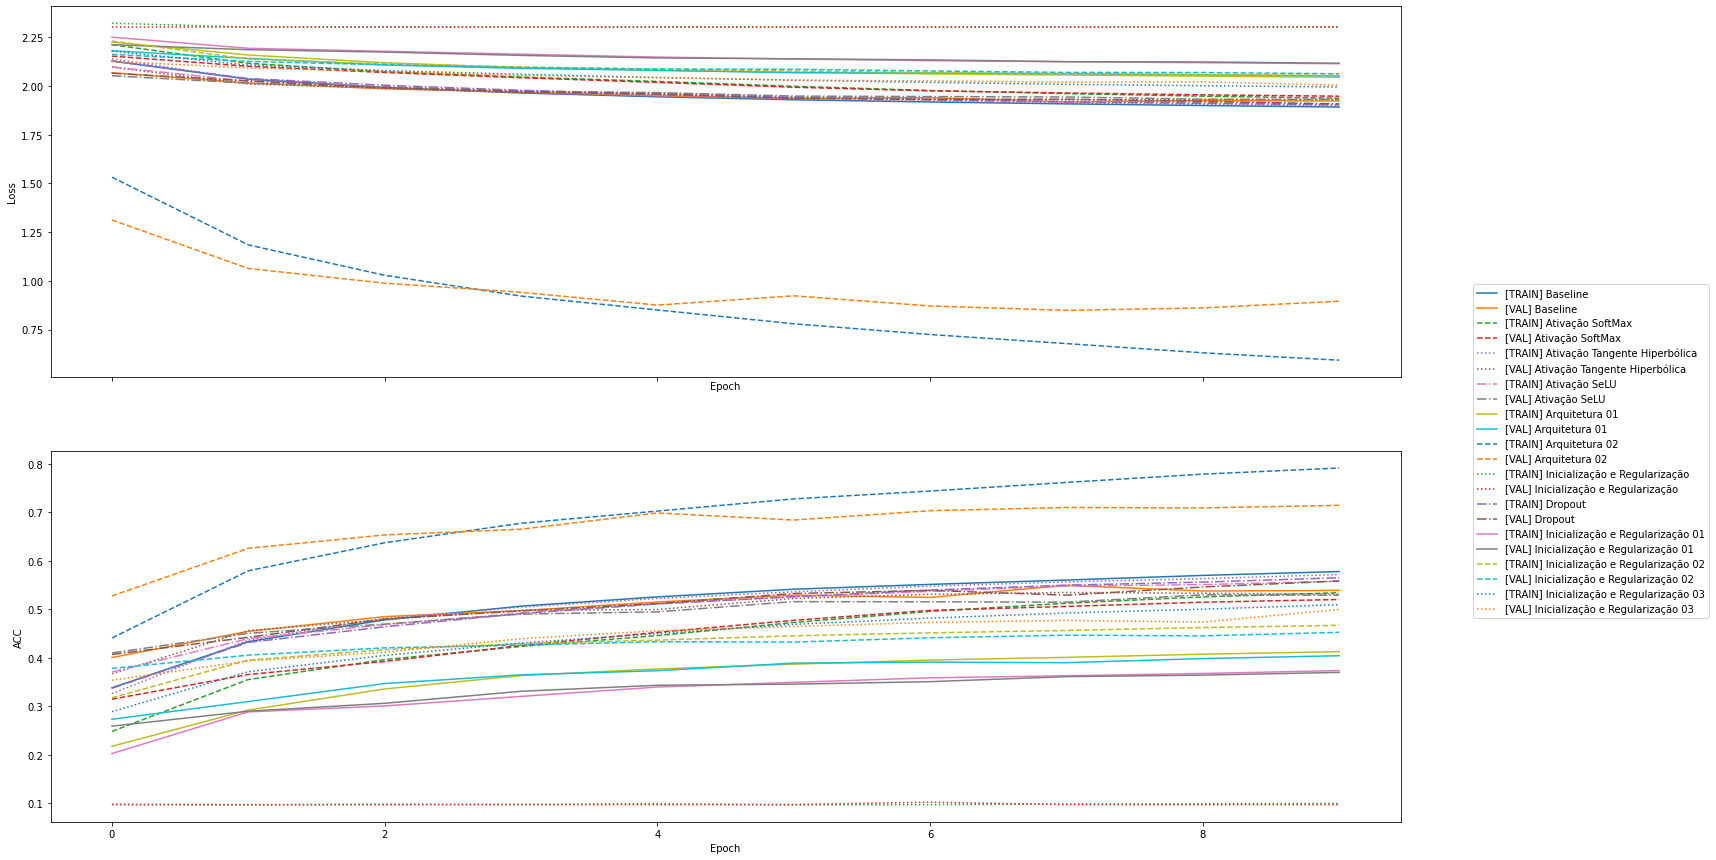

In [ ]:
plt.rcParams['figure.figsize'] = (30,15) 
plot_loss_accuracy(historyList, legend, plotSet='both')

5. A partir dos experimentos acima, construa o que você considera o melhor modelo e faça a avaliação no conjunto de teste. Obs: Avaliação no conjunto de teste só pode ser executada uma única vez.